# Binary classification of movie reviews

In [4]:
from keras.datasets import imdb

Keeping the top 10000 most frequently ocurring words

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 52s 3us/step


The data is an encoded sequence of words

In [22]:
train_data[4]

[1,
 249,
 1323,
 7,
 61,
 113,
 10,
 10,
 13,
 1637,
 14,
 20,
 56,
 33,
 2401,
 18,
 457,
 88,
 13,
 2626,
 1400,
 45,
 3171,
 13,
 70,
 79,
 49,
 706,
 919,
 13,
 16,
 355,
 340,
 355,
 1696,
 96,
 143,
 4,
 22,
 32,
 289,
 7,
 61,
 369,
 71,
 2359,
 5,
 13,
 16,
 131,
 2073,
 249,
 114,
 249,
 229,
 249,
 20,
 13,
 28,
 126,
 110,
 13,
 473,
 8,
 569,
 61,
 419,
 56,
 429,
 6,
 1513,
 18,
 35,
 534,
 95,
 474,
 570,
 5,
 25,
 124,
 138,
 88,
 12,
 421,
 1543,
 52,
 725,
 6397,
 61,
 419,
 11,
 13,
 1571,
 15,
 1543,
 20,
 11,
 4,
 2,
 5,
 296,
 12,
 3524,
 5,
 15,
 421,
 128,
 74,
 233,
 334,
 207,
 126,
 224,
 12,
 562,
 298,
 2167,
 1272,
 7,
 2601,
 5,
 516,
 988,
 43,
 8,
 79,
 120,
 15,
 595,
 13,
 784,
 25,
 3171,
 18,
 165,
 170,
 143,
 19,
 14,
 5,
 7224,
 6,
 226,
 251,
 7,
 61,
 113]

Decoding the sequence

In [16]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 4s 2us/step


In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [27]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[4]])

In [28]:
decoded_review

"? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

Encoding the integer sequences into a binary matrix

In [29]:
import numpy as np

In [46]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

In [106]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [114]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Model definition

In [109]:
from keras import models, layers

In [130]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [131]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Setting aside the validation set

In [115]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [132]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.4830 - acc: 0.7993 - val_loss: 0.3623 - val_acc: 0.8728
Epoch 2/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.2849 - acc: 0.9067 - val_loss: 0.2943 - val_acc: 0.8880
Epoch 3/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.2091 - acc: 0.9321 - val_loss: 0.2946 - val_acc: 0.8829
Epoch 4/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.1673 - acc: 0.9450 - val_loss: 0.3015 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1370 - acc: 0.9563 - val_loss: 0.2830 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1136 - acc: 0.9644 - val_loss: 0.2963 - val_acc: 0.8847
Epoch 7/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.0949 - acc: 0.9713 - val_loss: 0.3155 - 

In [133]:
history_dict = history.history

Plotting the training and validation loss

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

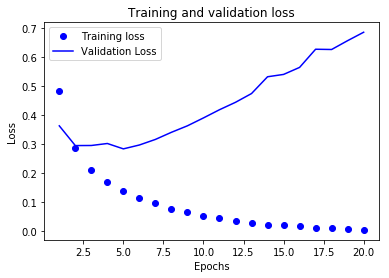

In [137]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

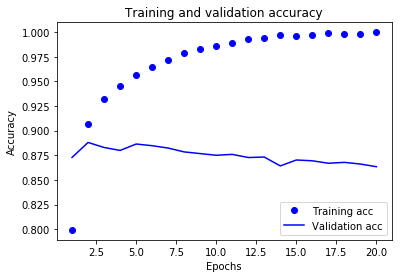

In [139]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Around the 5th epoch the loss is minimized and the accuracy is at its highest in the validation set. This is a good candidate for early stopping.

Retraining the model

In [141]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 4s 174us/step - loss: 0.4490 - acc: 0.8135
Epoch 2/5
25000/25000 [==============================] - 4s 144us/step - loss: 0.2535 - acc: 0.9118
Epoch 3/5
25000/25000 [==============================] - 4s 142us/step - loss: 0.1998 - acc: 0.9286
Epoch 4/5
25000/25000 [==============================] - 4s 145us/step - loss: 0.1630 - acc: 0.9431
Epoch 5/5
25000/25000 [==============================] - 7s 297us/step


In [142]:
results

[0.3213737705850601, 0.8778]

This approach archived an accuracy of about 88%, fairly accurate for a simple model.